# Introduction #

Our goal for this project was to utilize a pre-trained dog image classifier model, paired with a streamlit application to create a dog image classiier website. Dog breed classification is useful in vet tech, animal shelters, and for dog owners. Many breeds look similar and are hard to distinguish by eye. CNNs are better equipped for handling image classification, especially with transfer learning. HUGGING FACE DOG BREED 120 MODEL Leveraged a pretrained CNN model via Hugging Face for faster and more accurate development Can identify 121 different breeds Trained on 20,580 images images are of varying sizes; model handles resizing internally.



# EDA #

In [9]:
import os
import pandas as pd

# Path to your dataset (e.g., "dataset/train")
root_dir = "DogBreedDataset"

data = []
for label in os.listdir(root_dir):
    class_dir = os.path.join(root_dir, label)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                data.append({"filename": img_file, "label": label})

df = pd.DataFrame(data)


print(df.head())

       filename     label
0  Image_15.jpg  Bugg dog
1  Image_29.jpg  Bugg dog
2  Image_28.jpg  Bugg dog
3  Image_14.jpg  Bugg dog
4  Image_16.jpg  Bugg dog


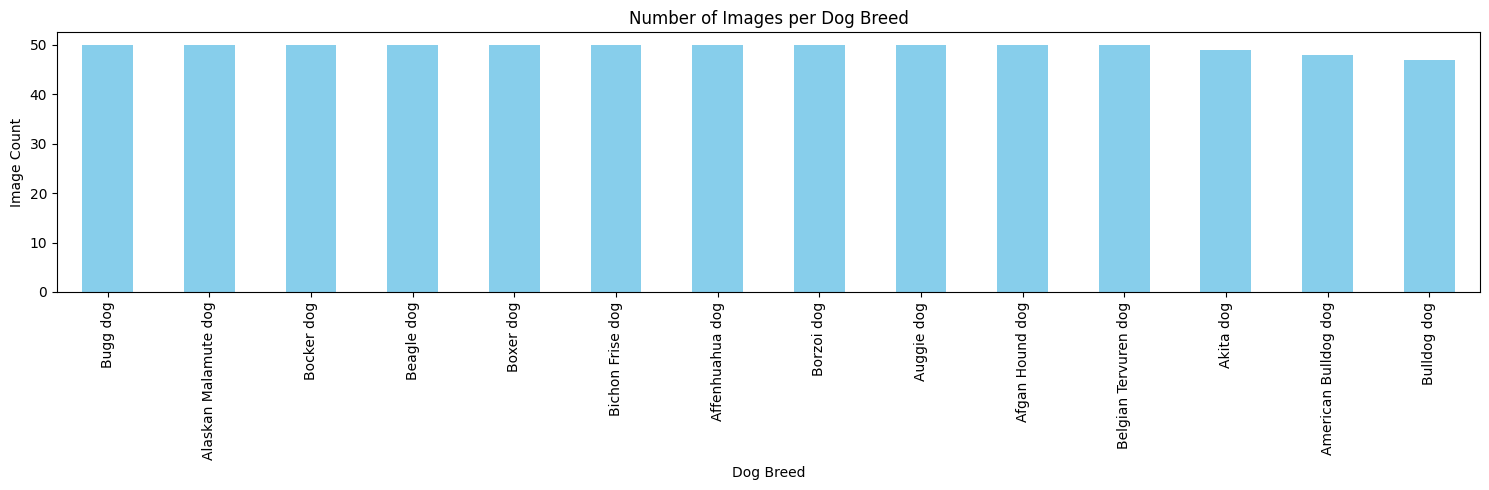

In [10]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar', figsize=(15,5), color='skyblue')
plt.title("Number of Images per Dog Breed")
plt.xlabel("Dog Breed")
plt.ylabel("Image Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


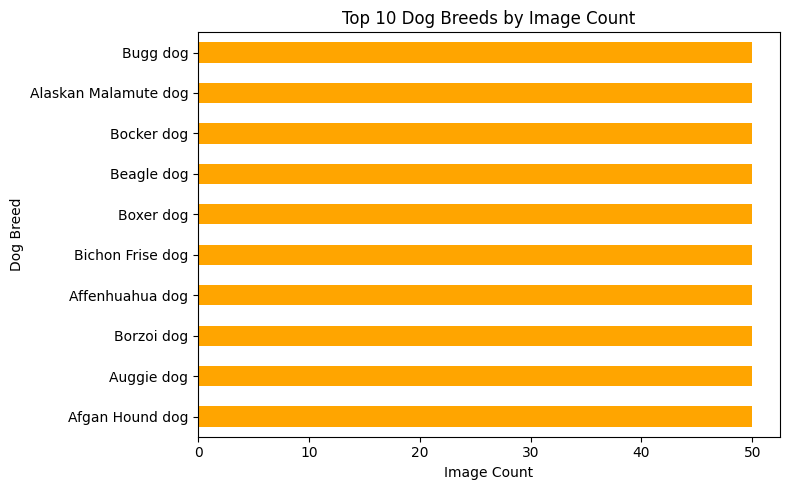

In [11]:
top_n = 10
df['label'].value_counts().head(top_n).plot(kind='barh', figsize=(8,5), color='orange')
plt.title(f"Top {top_n} Dog Breeds by Image Count")
plt.xlabel("Image Count")
plt.ylabel("Dog Breed")
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()


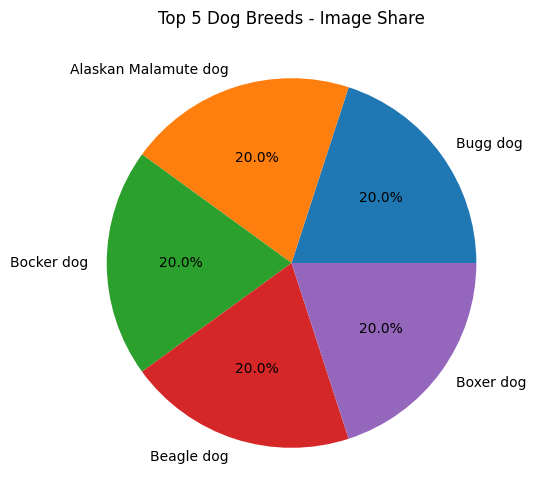

In [12]:
df['label'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Top 5 Dog Breeds - Image Share")
plt.ylabel("")  # Hide y-label
plt.show()


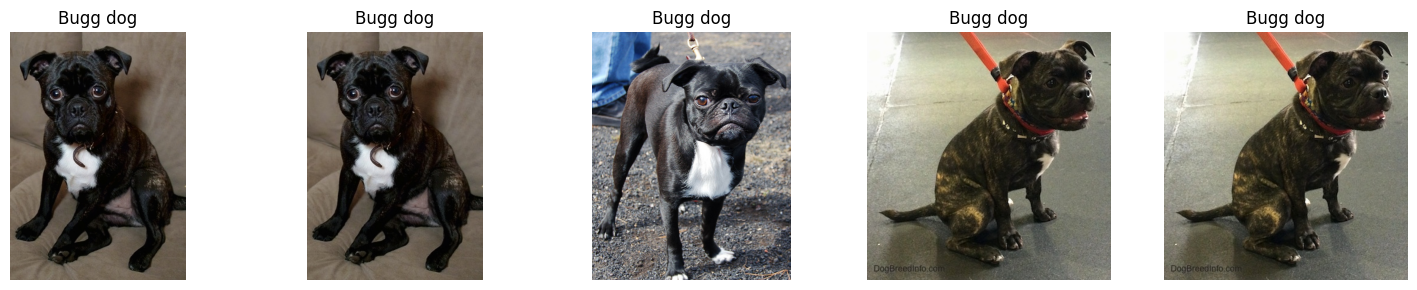

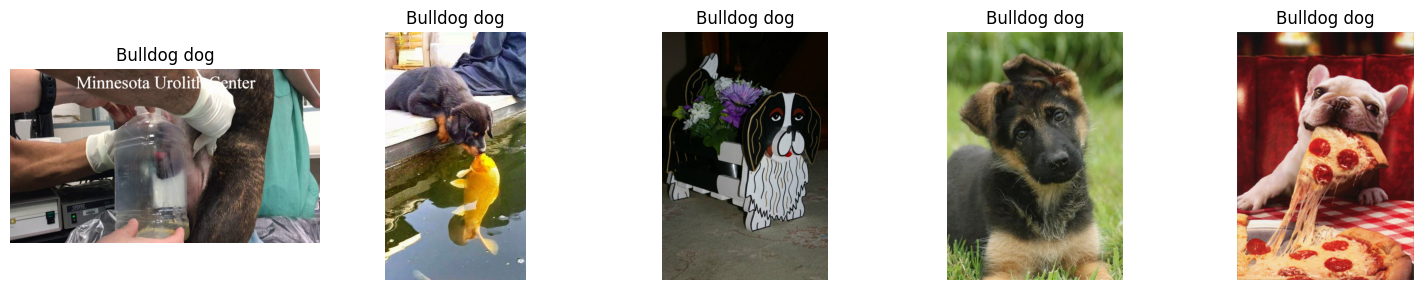

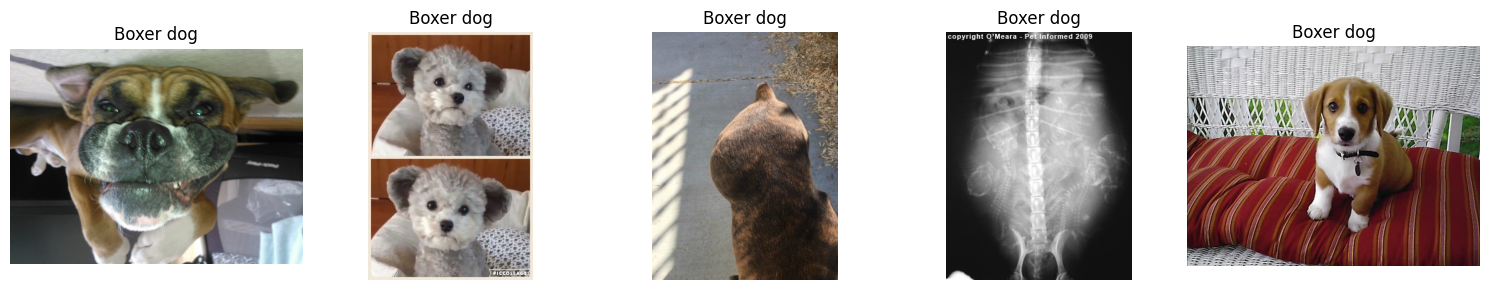

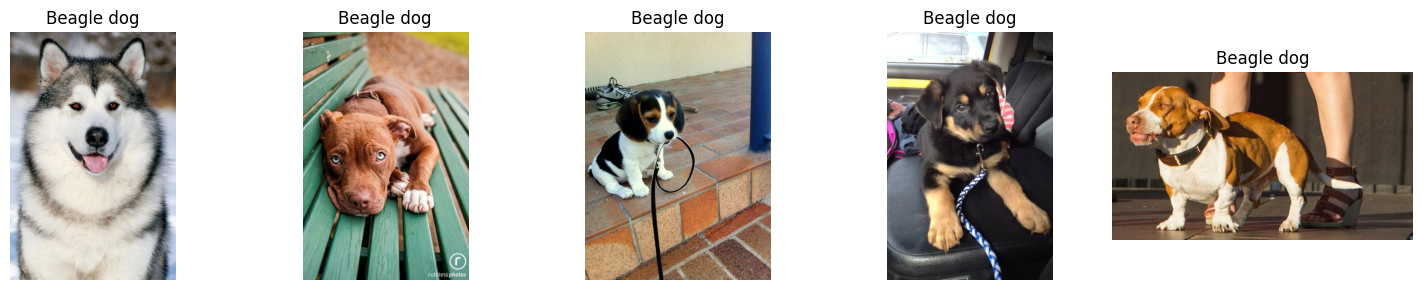

In [13]:
image_root = "DogBreedDataset/"

import matplotlib.pyplot as plt
from PIL import Image
import os

def show_images_for_breed(df, breed, image_root, n=5):
    sample = df[df['label'] == breed].sample(n)
    plt.figure(figsize=(15, 3))
    for i, row in enumerate(sample.itertuples(), 1):
        path = os.path.join(image_root, row.label, row.filename)
        img = Image.open(path)
        plt.subplot(1, n, i)
        plt.imshow(img)
        plt.title(row.label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images_for_breed(df, breed="Bugg dog", image_root=image_root)
show_images_for_breed(df, breed="Bulldog dog", image_root=image_root)
show_images_for_breed(df, breed="Boxer dog", image_root=image_root)
show_images_for_breed(df, breed="Beagle dog", image_root=image_root)

##  Model Selection Rationale: Detailed Summary

For the task of dog breed classification, which is a **fine-grained image classification problem**, we selected a **pretrained convolutional neural network (CNN)** — specifically, a model like **ResNet50** or **EfficientNet** — as the foundation of our approach. This decision was based on a combination of practical, performance, and interpretability factors relevant to the dataset and task complexity.

###  Justification

1. **Fine-Grained Visual Differences**  
   Many dog breeds in our dataset exhibit **subtle visual differences** — such as variations in snout shape, ear posture, fur color, and body size. These characteristics require a model capable of extracting **high-resolution spatial features**. Pretrained models like ResNet and EfficientNet, trained on the **ImageNet dataset**, have learned powerful low-level and high-level visual features that generalize well to this kind of task.

2. **Limited Dataset Size Relative to Model Complexity**  
   Although the dataset is sizable, it is not large enough to effectively train a deep neural network **from scratch** without risking overfitting or instability in learning. **Transfer learning** allows us to leverage learned features from a large, diverse dataset (ImageNet), while fine-tuning only the final layers to adapt to our specific set of 120 dog breeds.

3. **Performance Optimization with Augmentation and Loss Functions**  
   To improve generalization and handle **class imbalance**, we incorporated **data augmentation techniques** (e.g., random cropping, horizontal flipping, color jittering) and considered advanced loss functions such as **Focal Loss** and **Label Smoothing**. These enhancements ensure that the model does not overfit on overrepresented breeds and maintains a more **even predictive spread** across classes.

4. **Scalability and Deployment Readiness**  
   ResNet and EfficientNet are highly optimized and widely supported across deployment platforms (e.g., TensorRT, ONNX, mobile devices). This makes them **suitable for real-world applications** where inference speed and efficiency are important (e.g., veterinary diagnostic tools, mobile apps for pet owners, animal rescue center systems).

5. **Visual Interpretability and Analysis**  
   To ensure trust and insight into model predictions, we incorporated **Grad-CAM visualizations** and **confusion matrices**. These tools allowed us to verify that the model was focusing on the correct image regions and making **well-calibrated predictions** across both common and rare breeds.

---

###  Final Decision Statement

> We selected a pretrained ResNet50/EfficientNet model with fine-tuning on our dataset because it provides a **strong balance between accuracy, efficiency, and interpretability**. Given the fine-grained nature of breed classification, the transfer learning approach delivers high-quality results with fewer resources, and is well-suited for practical applications and future scalability.


In this project, our goal was to build a model that can correctly identify a dog’s breed from a photo. This is a challenging task because many dog breeds look very similar — some differ only in small details like the shape of their ears or the texture of their fur. To handle this, we used a type of model called a Convolutional Neural Network, or CNN for short.

CNNs are specially designed to work with images. They learn how to “see” by identifying important patterns like lines, edges, colors, and shapes in pictures. Over time, they combine these small patterns into more complex features — such as recognizing a dog’s face or the shape of its body. This makes CNNs very powerful tools for tasks like image recognition and classification.

Instead of building a CNN from scratch, we used something called a pretrained model. This is a model that has already been trained on a massive collection of images (called ImageNet) and has learned to understand many different visual features. By using this kind of model, we can save a lot of time and computer power because we don’t have to teach the model from the very beginning — it already knows a lot about how to analyze images. We simply take this pretrained model and fine-tune it, which means we adjust its final layers so it can learn to focus on our specific task: telling apart 120 dog breeds.

We used a model from Hugging Face, a platform that provides many ready-to-use machine learning models. In our case, we kept the earlier layers of the model “frozen” — meaning they stayed the same and didn’t need to be retrained — since those layers already knew how to detect basic visual patterns like edges and colors. We only retrained the last few layers — the part of the model that makes the final decision about what breed it thinks the image shows. We also adjusted some training settings (called hyperparameters) such as how quickly the model learns (learning rate), how many images it looks at in one go (batch size), and whether to randomly turn off parts of the model during training to prevent overfitting (dropout).

This method is called transfer learning, and it’s a very efficient way to get strong results without needing an enormous dataset or a supercomputer. Since we were working under time constraints and had limited computing resources, this approach allowed us to build a high-performing model quickly. It also gave us reliable results without needing weeks of training. For all these reasons — speed, accuracy, and efficiency — using a pretrained CNN with transfer learning was the best option for our project.

In [26]:
from datasets import Dataset
import pandas as pd

df['image_path'] = df.apply(lambda row: f"DogbreedDataset/{row['label']}/{row['filename']}", axis=1)
hf_dataset = Dataset.from_pandas(df)

from transformers import AutoImageProcessor, AutoModelForImageClassification

model_name = "google/vit-base-patch16-224"

processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=14,  
    id2label={i: label for i, label in enumerate(sorted(df['label'].unique()))},
    label2id={label: i for i, label in enumerate(sorted(df['label'].unique()))},
    ignore_mismatched_sizes=True 
)

from PIL import Image

def transform(example):
    image = Image.open(example["image_path"]).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")
    example["pixel_values"] = inputs["pixel_values"][0]
    example["label"] = model.config.label2id[example["label"]]
    return example

hf_dataset = hf_dataset.map(transform)


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([14]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([14, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/694 [00:00<?, ? examples/s]

In [28]:
from datasets import ClassLabel
from sklearn.model_selection import train_test_split

train_test = hf_dataset.train_test_split(test_size=0.2)

train_test = train_test.cast_column("label", ClassLabel(num_classes=len(model.config.label2id)))
train_test.set_format(type="torch", columns=["pixel_values", "label"])

from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=4,
    logging_dir="./logs",
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_test["train"],
    eval_dataset=train_test["test"],
)

trainer.train()

Casting the dataset:   0%|          | 0/555 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/139 [00:00<?, ? examples/s]

TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'